# 基于CNN模型的物体识别

## 1.复习上课内容以及复现课程代码

在本部分，你需要复习上课内容和课程代码后，自己复现课程代码。

## 2.回答以下理论题目?

### 2.1. Suppose your input is a 100 by 100 gray image, and you use a convolutional layer with 50 filters that are each 5x5. How many parameters does this hidden layer have (including the bias parameters)? 

In [ ]:
#answer：parameters = (5*5+1)*50 = 1300
(5*5+1)*50

### 2.2. What are "local invariant" and "parameter sharing" ?

In [ ]:
"""
answer: 

Local invarient features a paradigm, not just a method to select interesting locations in the image, or to speed up analysis, 
but rather a new image representation, that allows to decribe the objects(parts) without the need of segmentation.

Parameter sharing is sharing of weights by all neurons in a particular feature map.
"""


### 2.3. Why we use batch normalization ?

In [ ]:
'''
answer:
Batch Normalization allows us to use much higher learning rates and be less careful about initialization. 
It also acts as a regularizer, in some cases eliminating the need for Dropout.

https://arxiv.org/abs/1502.03167
'''


### 2.4. What problem does dropout try to solve ?

In [ ]:
#answer: overfitting

## 3. 实践题

### 3.1 In the first session of the practical part, you will implement an image classification model using any deep learning libraries that you are familiar with,  which means, except for tensorflow and keras, you can also use pytorch/caffe/... .  The dataset used in this session is the cifar10 which contains 50000 color (RGB) images, each with size 32x32x3.  All 50000 images are classified into ten categories. 

In [119]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import keras


Load the dataset. 

In [163]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.cifar10.load_data()
print(x_train.shape,y_train.shape)

(50000, 32, 32, 3) (50000, 1)


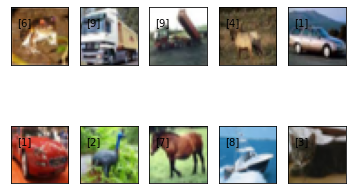

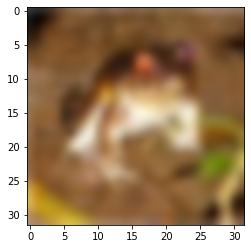

In [124]:
for i in range(1,11):
    plt.subplot(2,5,i)
    plt.imshow(x_train[i-1])
    plt.text(3,10,str(y_train[i-1]))
    plt.xticks([])
    plt.yticks([])
plt.show()

plt.imshow(x_train[0], interpolation = 'bicubic')
plt.show()

In [164]:
#nomalize data 
x_train = x_train/255
x_test = x_test/255
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)
print(x_train.shape,y_train.shape)

(50000, 32, 32, 3) (50000, 10)


##### It is your time to build your model. Try your best to build a model with good performance on the test set.

In [ ]:
'''
##不会处理内存问题 -_- 尝试了加lambda层但是报错：iterating over `tf.Tensor` is not allowed in Graph execution. Use Eager execution or decorate this function with @tf.function.

#resize the input images to fit the model
def resize_image(input_img, resized_pix = 224):
    from PIL import Image
    import numpy as np
    
    #the following code has a memory error 
    resized_images = np.array([np.array(Image.fromarray(i).resize((resized_pix,resized_pix), Image.BICUBIC)) for i in input_img])
    
    """
    # the for loop version - cannot fix the memory error
    #create the container 
    resized_images = np.zeros((img_num, resized_pix, resized_pix, img_channel))
    for i in range(0, img_num):
        img = input_img[i]
        img = Image.fromarray(img)
        img = np.array(img.resize(resized_pix, resized_pix), Image.BICUBIC) #resize and change the img back to a numpy array
        resized_images[i,:,:,:] = img    
    """
    return resized_images

'''

In [161]:
#initialize the model
#My input image should at the size of 224 * 224 * 3, because small-size images cannot fit the model.
from keras.models import Sequential
model = Sequential()

#add layers to the model
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, Reshape
from keras.optimizers import SGD

model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape = (32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
#model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

#model.add(Conv2D(256, (3, 3), activation='relu'))
#model.add(Conv2D(256, (3, 3), activation='relu'))
#model.add(Conv2D(256, (3, 3), activation='relu'))
#model.add(MaxPooling2D(pool_size = (2, 2)))
#model.add(Conv2D(512, (3, 3), activation='relu'))
#model.add(Conv2D(512, (3, 3), activation='relu'))
#model.add(Conv2D(512, (3, 3), activation='relu'))
#model.add(MaxPooling2D(pool_size = (2, 2)))
#model.add(Conv2D(512, (3, 3), activation='relu'))
#model.add(Conv2D(512, (3, 3), activation='relu'))
#model.add(Conv2D(512, (3, 3), activation='relu'))
#model.add(MaxPooling2D(pool_size = (2, 2)))
#model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))

#optimizer 
sgd = SGD(lr = 0.0001, decay = 1e-6, momentum = 0.9, nesterov = True)
model.compile(loss = 'categorical_crossentropy', optimizer = sgd, metrics = ['accuracy'])


In [159]:
model.summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_116 (Conv2D)          (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_117 (Conv2D)          (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_118 (Conv2D)          (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_119 (Conv2D)          (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_120 (Conv2D)          (None, 3, 3, 128)       

In [167]:
#apply the model to the data
history = model.fit(x_train, y_train, batch_size=64, epochs=100, verbose=2, validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
 - 13s - loss: 1.8636 - accuracy: 0.3103 - val_loss: 1.7865 - val_accuracy: 0.3555
Epoch 2/100
 - 13s - loss: 1.8481 - accuracy: 0.3194 - val_loss: 1.7762 - val_accuracy: 0.3586
Epoch 3/100
 - 12s - loss: 1.8325 - accuracy: 0.3264 - val_loss: 1.7559 - val_accuracy: 0.3660
Epoch 4/100
 - 12s - loss: 1.8197 - accuracy: 0.3322 - val_loss: 1.7503 - val_accuracy: 0.3728
Epoch 5/100
 - 12s - loss: 1.8089 - accuracy: 0.3346 - val_loss: 1.7479 - val_accuracy: 0.3716
Epoch 6/100
 - 12s - loss: 1.7987 - accuracy: 0.3414 - val_loss: 1.7277 - val_accuracy: 0.3744
Epoch 7/100
 - 12s - loss: 1.7856 - accuracy: 0.3434 - val_loss: 1.7128 - val_accuracy: 0.3878
Epoch 8/100
 - 12s - loss: 1.7757 - accuracy: 0.3457 - val_loss: 1.7050 - val_accuracy: 0.3895
Epoch 9/100
 - 12s - loss: 1.7664 - accuracy: 0.3526 - val_loss: 1.7107 - val_accuracy: 0.3915
Epoch 10/100
 - 12s - loss: 1.7574 - accuracy: 0.3557 - val_loss: 1.6786 - val_accuracy: 0.3972

In [171]:
score = model.evaluate(x_test, y_test, batch_size=128, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 1s 97us/step
Test loss: 1.2801698451995849
Test accuracy: 0.5414000153541565


###  Congratulations! You hanve finished the assignment 3.   

In [ ]:
#cite: 
#cifar10 example in keras-
# https://blog.csdn.net/tsyccnh/article/details/78838005
# https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/
#keras intro doc- https://keras.io/zh/
#resize images in keras- https://www.cnblogs.com/wuliytTaotao/p/11191702.html
